In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:

missing = [' ']
eurusdH4 = pd.read_csv("EuroGBP_H1.csv", na_values = missing)
eurusdH4.dropna(inplace = True) 
print(eurusdH4.shape)
mean = eurusdH4['Mean']
low = eurusdH4['Low']
high = eurusdH4['High']

(19667, 20)


In [19]:
X = eurusdH4.values[:,3:15]

In [4]:
X[1][0]

0.8910899999999999

In [5]:
# lowX_train, lowX_test, lowy_train, lowy_test = train_test_split(
#     X, low, test_size=0.1, random_state=0)

In [11]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:15]]


# X=X._values
# y=y._values

LRmodel.fit(X, low)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
lowY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 13)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((low-lowY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((low-Y_bar)**2)
MSE = (sum((low - lowY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )


RSS : 74582112.75399193
MSE : 3794.75489742505
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -83078.8848       15.083    -5508.189    0.000
1               Open   81057.4815      323.803      250.330    0.000
2                 Ma    9475.9318  1077822.960        0.009    0.993
3                Rsi       0.6259        0.121        5.191    0.000
4                CCI       0.2726        0.007       38.419    0.000
5                adx      -0.0216        0.048       -0.450    0.653
6               Macd   11377.8607      881.928       12.901    0.000
7                atr  -21666.4020      949.378      -22.822    0.000
8            Chaiken       0.0000        0.000        8.050    0.000
9            HighLow      -0.0004        0.000      -10.417    0.000
10          Aligator    9475.9324  1077826.307        0.009    0.993
11                AC    7250.8434      608.302       11.920    0.000
12                AD       0.0000        0.000        1.

In [22]:
lowData = []
lowData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
lowData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
lowData['Actual Low'] = low
lowData['Predicted Low'] = lowY_hat
lowData.to_csv('low data prediction.csv',index=False)

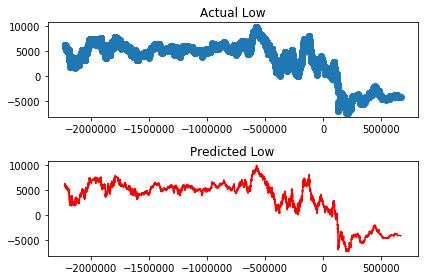

In [14]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,low)
ax1.set_title('Actual Low')
ax2.plot(np.sort(XX) ,lowY_hat ,color='red');
ax2.set_title('Predicted Low')

plt.tight_layout()
# plt.show()

In [25]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:15]]


# X=X._values
# y=y._values

LRmodel.fit(X, high)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
highY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.000001*np.random.rand(len(newX['Constant']), 13)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((high-highY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((high - Y_bar)**2)
MSE = (sum((high - highY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 124222457.04237862
MSE : 6320.46693000807
   Coefficient Names  Coefficient   Std. Error  t-statistic  P-value
0          Intercept  -83037.3204       19.467    -4265.537    0.000
1               Open   95431.9202      417.884      228.369    0.000
2                 Ma    2235.1073  1383480.780        0.002    0.999
3                Rsi       2.7081        0.156       17.403    0.000
4                CCI       0.2426        0.009       26.490    0.000
5                adx      -0.0337        0.062       -0.546    0.585
6               Macd  -27883.0677     1138.162      -24.498    0.000
7                atr   41465.6894     1225.184       33.844    0.000
8            Chaiken      -0.0000        0.000       -2.345    0.019
9            HighLow      -0.0001        0.000       -2.055    0.040
10          Aligator    2235.1064  1383477.056        0.002    0.999
11                AC  -14127.1623      785.050      -17.995    0.000
12                AD      -0.0000        0.000       -1

In [27]:
highData = []
highData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
highData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
highData['Actual High'] = high
highData['Predicted High'] = highY_hat
highData.to_csv('High data prediction.csv',index=False)

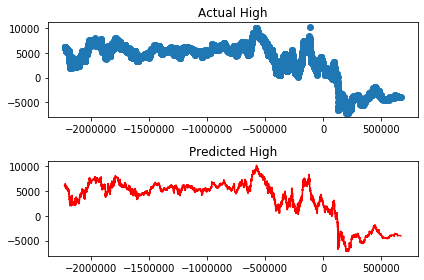

In [29]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,high)
ax1.set_title('Actual High')
ax2.plot(np.sort(XX) ,highY_hat ,color='red');
ax2.set_title('Predicted High')

plt.tight_layout()
plt.show()

In [23]:
# meanX_train, meanX_test, meany_train, meany_test = train_test_split(
#     X, mean, test_size=0.1, random_state=0)

In [30]:
LRmodel = LR()

X_copy=eurusdH4[eurusdH4.columns[3:15]]


# X=X._values
# y=y._values

LRmodel.fit(X, mean)
params = np.append(LRmodel.intercept_, LRmodel.coef_)
meanY_hat = LRmodel.predict(X)
Y_bar=LRmodel.intercept_
newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
dfDirty = newX+0.00001*np.random.rand(len(newX['Constant']), 13)
newX = dfDirty
newX=newX.astype("Float64") 
RSS= sum((mean-meanY_hat)**2)
print('RSS : ' + str(RSS))
TSS= sum((mean-Y_bar)**2)
MSE = (sum((mean - meanY_hat) ** 2)) / (len(newX) - len(newX.columns))
print('MSE : ' + str(MSE))
F_statistic=((TSS-RSS)/len(X))/MSE
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)


myDF3 = pd.DataFrame()
a=list(X_copy.columns.values)
a.insert(0,"Intercept")
myDF3["Coefficient Names"],myDF3["Coefficient"],myDF3["Std. Error"],myDF3["t-statistic"],myDF3["P-value"] = [np.array(a),params,sd_b,ts_b,p_values]
print(myDF3)
print("F-statistic=",F_statistic )

RSS : 48118294.60980013
MSE : 2448.2697979953255
   Coefficient Names  Coefficient  Std. Error  t-statistic  P-value
0          Intercept  -83058.1026      12.116    -6855.170    0.000
1               Open   88244.7009     260.076      339.303    0.000
2                 Ma    5855.5196   86558.694        0.068    0.946
3                Rsi       1.6670       0.097       17.212    0.000
4                CCI       0.2576       0.006       45.196    0.000
5                adx      -0.0277       0.038       -0.718    0.473
6               Macd   -8252.6035     708.351      -11.650    0.000
7                atr    9899.6437     762.526       12.983    0.000
8            Chaiken       0.0000       0.000        3.127    0.002
9            HighLow      -0.0002       0.000       -8.136    0.000
10          Aligator    5855.5194   86560.059        0.068    0.946
11                AC   -3438.1595     488.604       -7.037    0.000
12                AD       0.0000       0.000        0.123    0.902

In [31]:
meanData = []
meanData = pd.DataFrame(eurusdH4[eurusdH4.columns[3:]])
meanData.columns = ['Open', 'Ma', 'Rsi', 'CCI', 'adx', 'Macd', 'atr', 'Chaiken',
                   'HighLow', 'Aligator', 'AC', 'AD', 'Date', 'Close', 'Dt',
                   'Mom-BollObv', 'Adx-Boll']
meanData['Actual Mean'] = mean
meanData['Predicted Mean'] = meanY_hat
meanData.to_csv('Mean data prediction.csv',index=False)

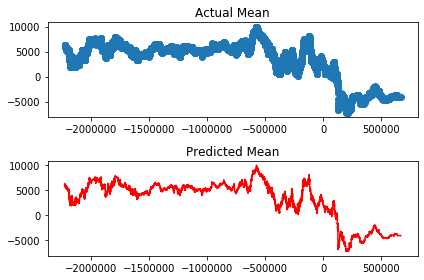

In [32]:
# plot

XX = X[:,-1]
# plt.figure(figsize=(2, 2))
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(np.sort(XX) ,mean)
ax1.set_title('Actual Mean')
ax2.plot(np.sort(XX) ,meanY_hat ,color='red');
ax2.set_title('Predicted Mean')

plt.tight_layout()
plt.show()

In [34]:

print(len(meanY_hat), len(low))

gg = np.sum(meanY_hat >= low)
print(gg)

19667 19667
18550


In [50]:
gg1 = np.sum(meanY_hat <= high)
print(gg1)

18623


In [46]:
gg1 = np.sum(highY_hat <= low)
print(gg1)

24


In [48]:
gg1 = np.sum(lowY_hat >= high)
print(gg1)

3


In [39]:
highg = np.sum(highY_hat >=high)
print(highg)

11964


In [40]:
lowg = np.sum(lowY_hat < low)
print(lowg)

12216


In [42]:
print(meanY_hat)

[ 6031.41509059  6111.89794881  6127.20742488 ... -4029.22241769
 -4024.78481465 -4074.44450835]


In [51]:
19667-18623

1044